In [5]:
from vista_ssm import vista, EMmlgssm, InitEMmlgssm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=600

In [6]:
simul=vista.loaddic('../data/sim_data.pickle')
params=simul['param']
data=simul['data']
tp=simul['tp']
label=simul['label']

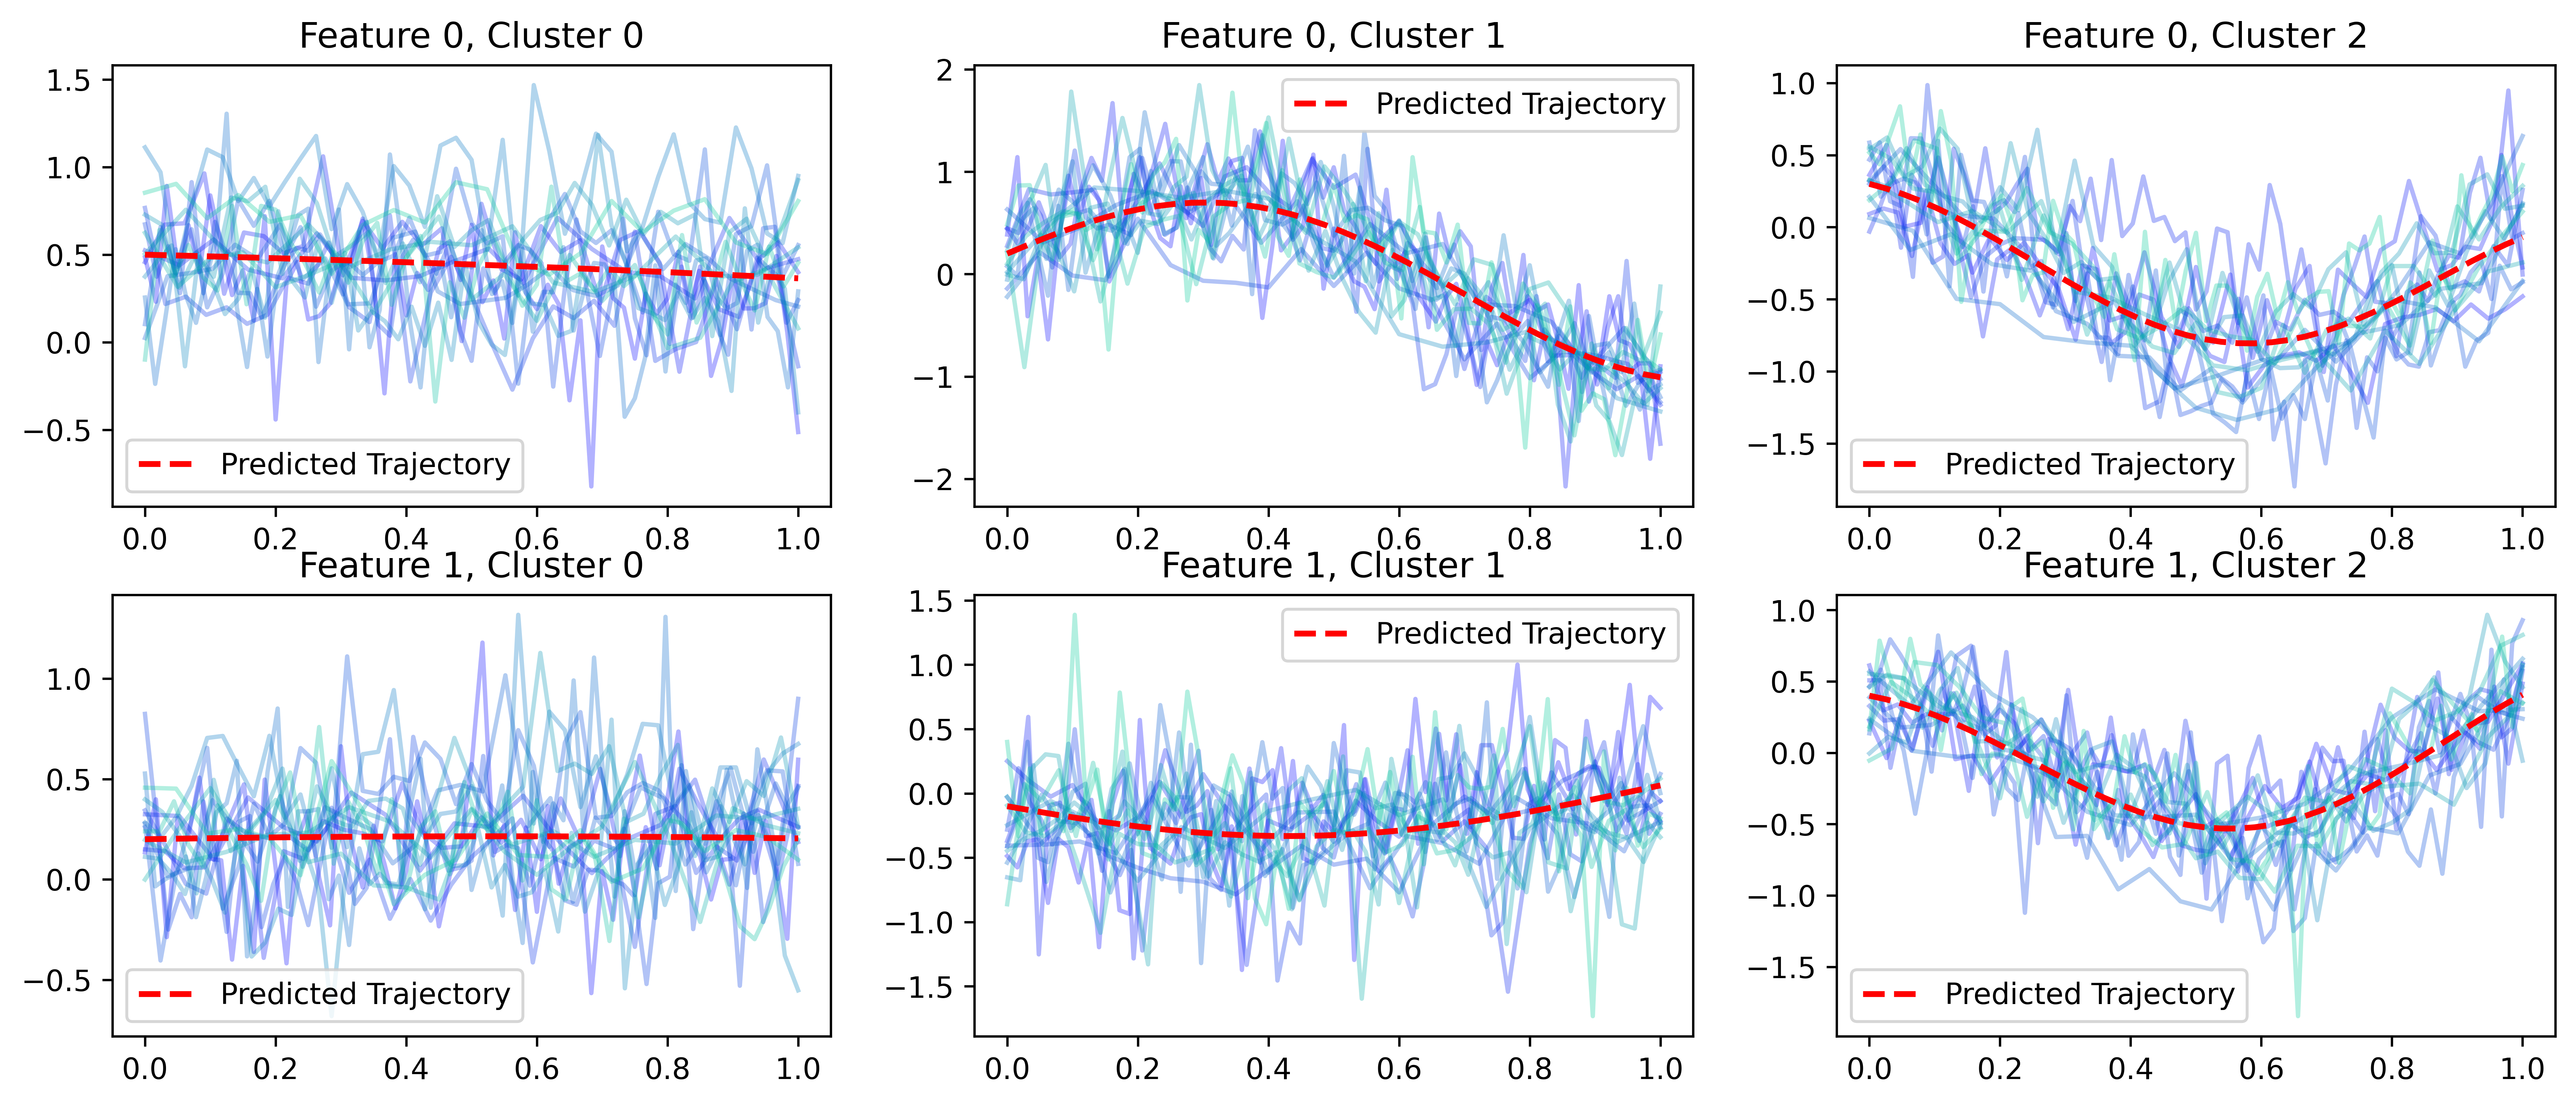

In [7]:
vista.predicted_trajectories(params,data,label,T=40,T_final=1,num_sam=15,plotcolor=(plt.cm.winter,0,0.8,0.3))

In [ ]:
for nc in [2,3,4]:
    for dx in range(3,8):
        print((nc,dx))
        param_dic={'DIM_X': dx,
                   'DIM_Y': 2,
                   'NUM_DATA': 120,
                   'N_CLUSTER' : nc,
                   'NUM_CPU' : 30,
                   'FIX' : [],
                   'NUM_LGSSM' : 30,
                   'MAX_ITER' : 1000,
                   'EPSILON' : 0.1,
                   'BIC' : True}
        result_sim=vista.runMLGSSM('ident',param_dic,data,tp,label=label)
        vista.savedic(result_sim,'../results/simulated/sim_ident_'+str(nc)+'_cluster_'+str(dx)+'_latent_0.pickle')

In [9]:
vista.agg_perf('../results/simulated/sim_ident_',[2,3,4],list(range(3,8)),1,criteria=[1],std=[False,False],label=label)

Information Criteria:

ABIC:
          2         3         4
3  4.09E+03  3.50E+03  3.41E+03
4  4.50E+03  3.88E+03  4.30E+03
5  4.55E+03  3.65E+03  4.08E+03
6  4.90E+03  4.76E+03  4.75E+03
7  5.31E+03  5.61E+03  5.54E+03

Cluster Similarity:
      2     3     4
3  0.75  1.00  1.00
4  0.75  1.00  0.98
5  0.75  1.00  0.99
6  0.75  1.00  0.99
7  0.75  1.00  0.99


confusion matrix
[[40  0  0]
 [ 0 50  0]
 [ 0  0 30]]
Accuracy :  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        30

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



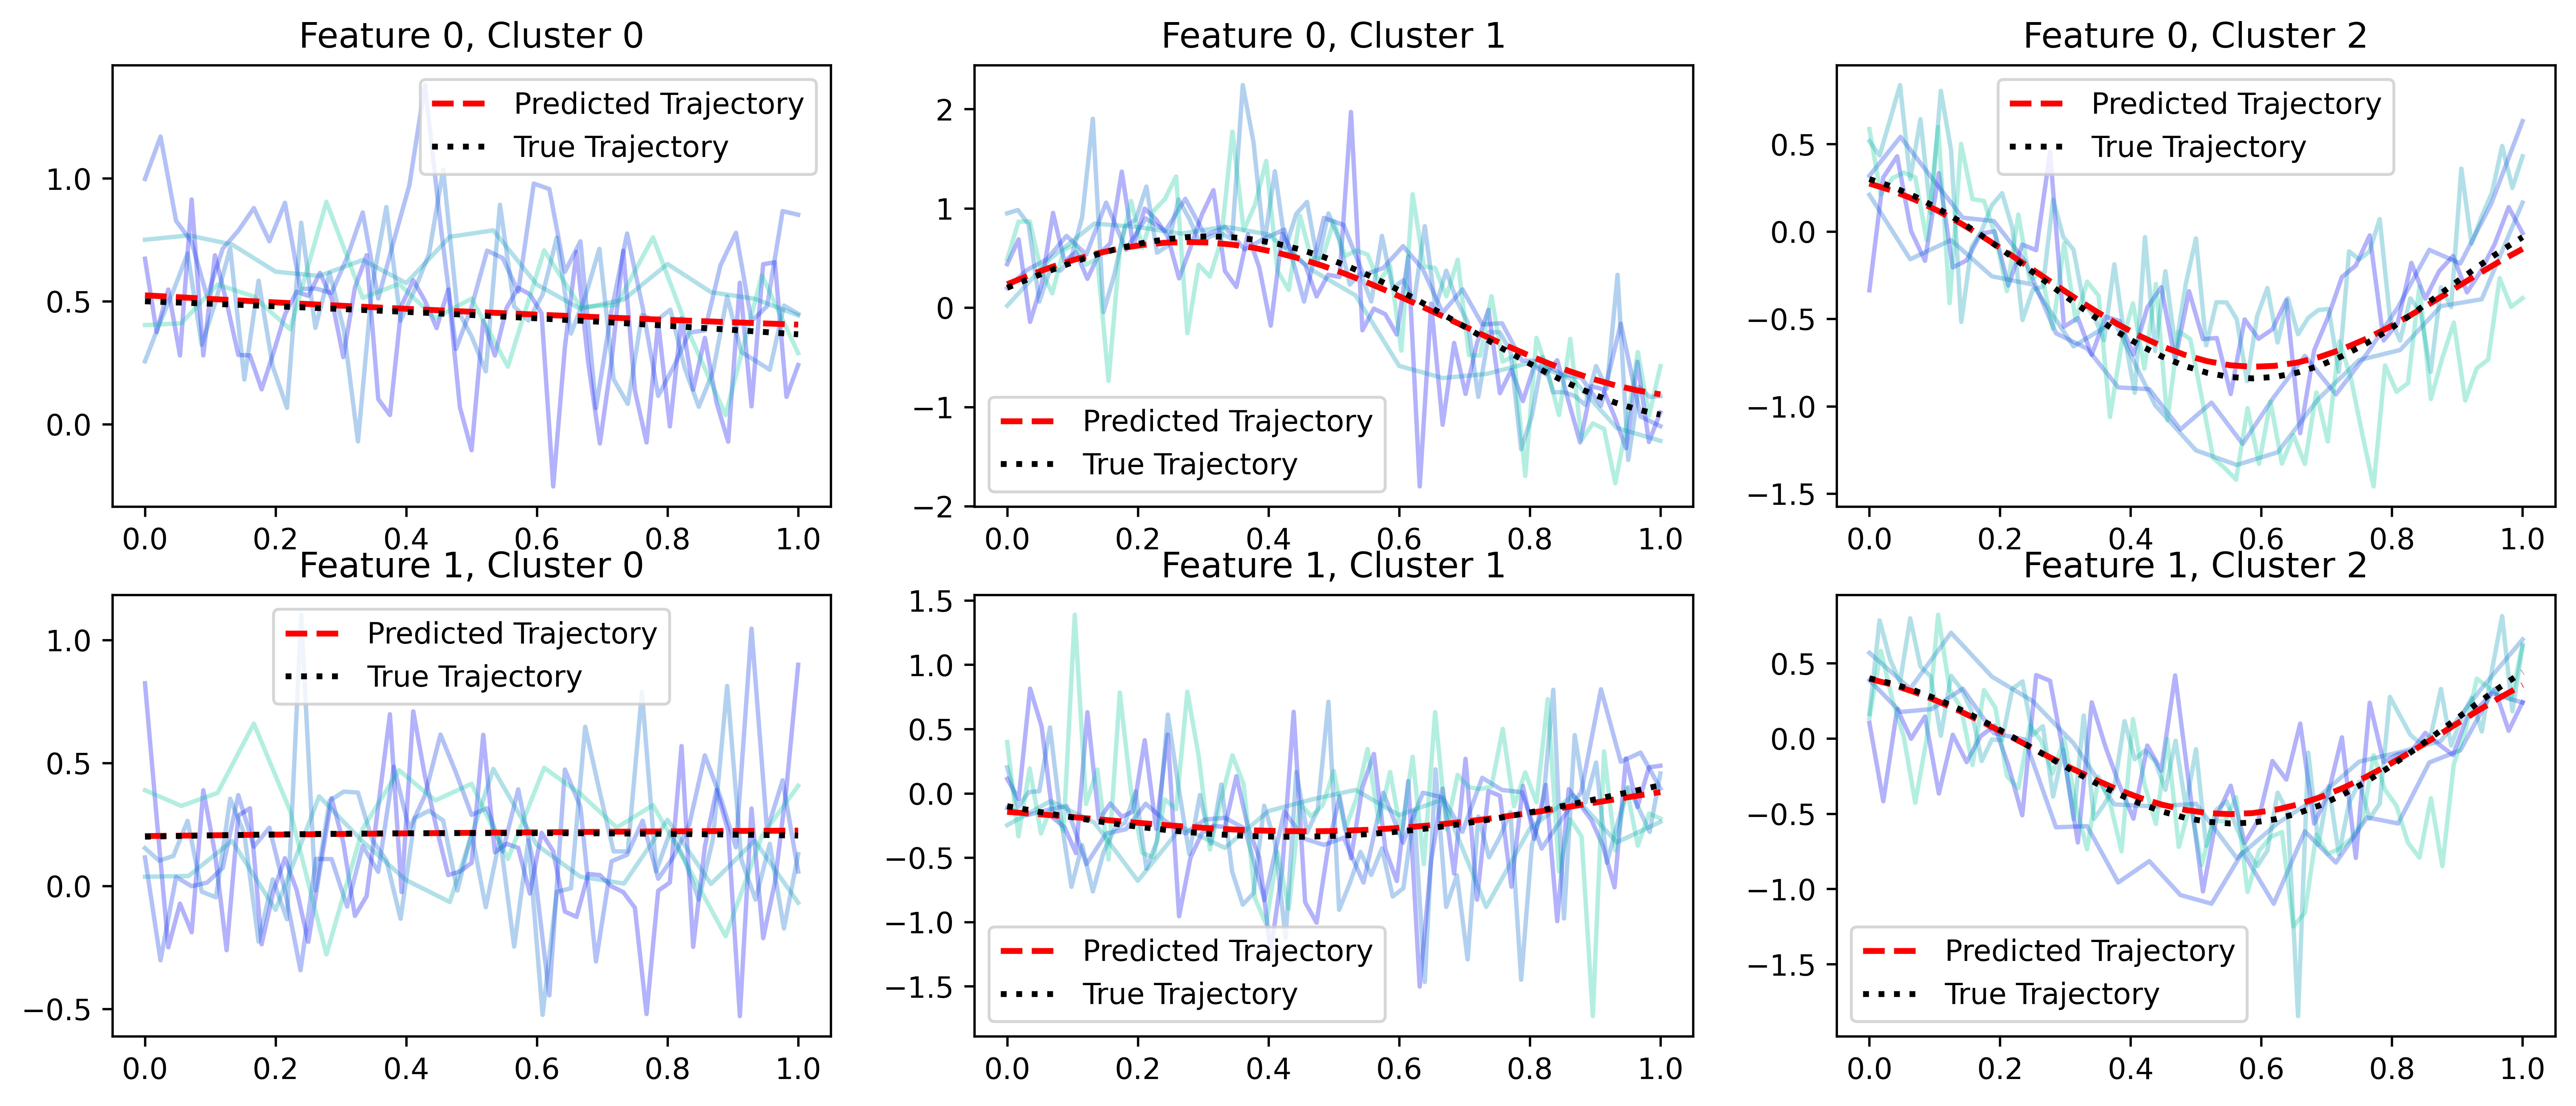

In [7]:
n_cluster=3
result=vista.loaddic('../results/simulated/sim_ident_3_cluster_5_latent_0.pickle')
vista.summarystats(label,result['label'],n_cluster)
result_permuted=vista.best_perm(label,result['label'],n_cluster,result['parameter']) #make sure labels line up (maximizing the trace)
vista.predicted_trajectories(result_permuted['parameter'],data,result_permuted['label'],30,true=params,
                              num_sam=5,plotcolor=(plt.cm.winter,0,0.8,0.3)) #plot noiseless trajectories